In [1]:
%matplotlib inline
from nansat import *
from cmocean import cm
from IPython.display import Image

In [2]:
n_arc = Nansat(
    '/vagrant/shared/test_data/cmems/ARC-METNO-ARC-TOPAZ4_2_PHYS-FOR-TDS-x20-X80-y60-Y90-20170520-20170530.nc')

In [3]:
n_siw = Nansat(
    '/vagrant/shared/test_data/cmems/SIW-DMI-ARC-SEAICE_TEMP-OBS-TDS-x0-X100-y60-Y90-20170520-20170525.nc')

=>Arctic Sea and Ice Surface Temperature, L4, 5km daily  (DMI-ARC-SEAICE_TEMP-L4-NRT-OBS)<=


In [4]:
d = Domain('+proj=stere +lon_0=55 +lat_0=75 +no_defs',
           '-te -1000000 -1000000 1000000 1000000 -tr 10000 10000')

n_arc.reproject(d)
n_siw.reproject(d)

In [5]:
fice = n_arc['fice_004']
sic = n_siw['sea_ice_fraction_004']

In [6]:
nmap = Nansatmap(n_siw, resolution='l')
nmap.imshow(sic, vmin=0, vmax=1, cmap=cm.ice)
nmap.add_colorbar(shrink=0.5)
nmap.save('sic_map.png', dpi=300)
nmap.imshow(fice, vmin=0, vmax=1, cmap=cm.ice)
nmap.save('fice_map.png', dpi=300)
plt.close('all')

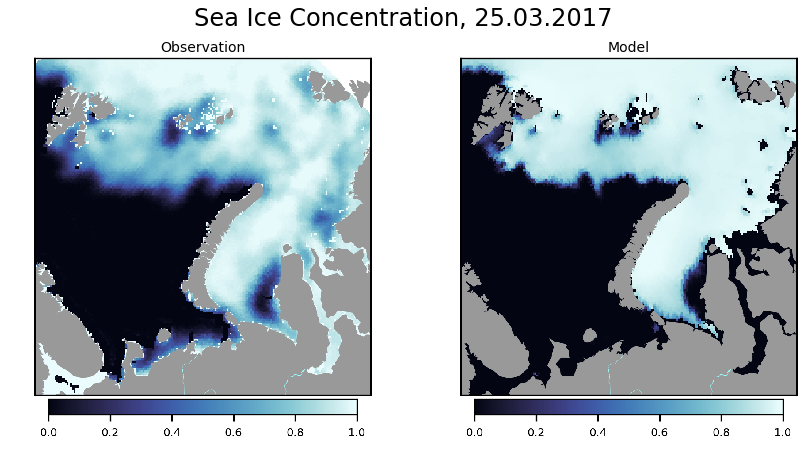

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].imshow(plt.imread('sic_map.png'))
ax[0].axis('off')
ax[0].set_title('Observation', fontsize=14)
ax[1].imshow(plt.imread('fice_map.png'))
ax[1].axis('off')
ax[1].set_title('Model', fontsize=14)
t = plt.suptitle('Sea Ice Concentration, 25.03.2017', fontsize=24)

In [8]:
nmap = Nansatmap(n_siw, resolution='l')
nmap.imshow(n_arc['hice'], vmin=0, vmax=1.5)
nmap.add_colorbar(shrink=0.5)
nmap.save('hice00_map.png', dpi=300)
nmap.imshow(n_arc['hice_010'], vmin=0, vmax=1.5)
nmap.save('hice10_map.png', dpi=300)
plt.close('all')

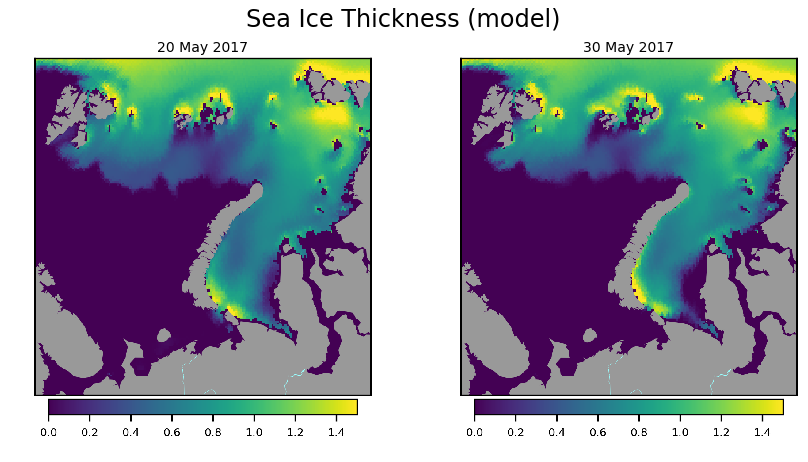

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].imshow(plt.imread('hice00_map.png'))
ax[0].axis('off')
ax[0].set_title('20 May 2017', fontsize=14)
ax[1].imshow(plt.imread('hice10_map.png'))
ax[1].axis('off')
ax[1].set_title('30 May 2017', fontsize=14)
t = plt.suptitle('Sea Ice Thickness (model)', fontsize=24)

In [ ]:
### work only in IPYTHON:
points = n_siw.digitize_points('sea_ice_fraction')

In [10]:
p0 = np.load('points2.npz')['p0']
p1 = np.load('points2.npz')['p1']
lon0, lat0 = n_arc.transform_points(p0[0], p0[1])
lon1, lat1 = n_arc.transform_points(p1[0], p1[1])

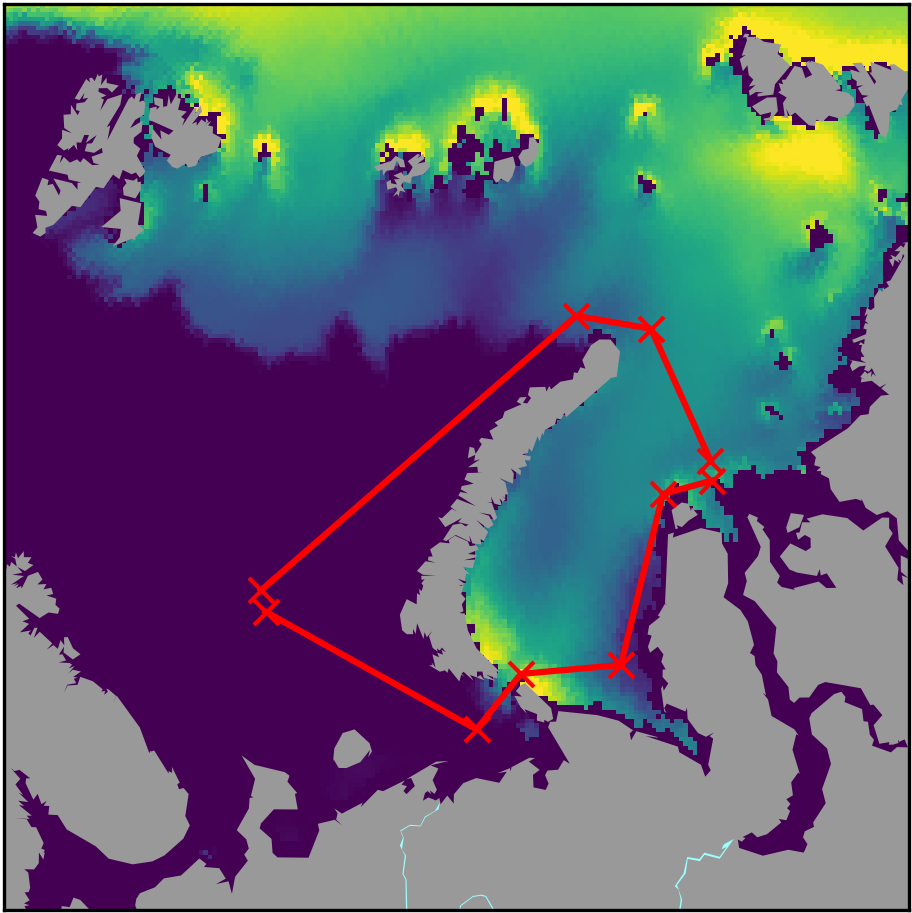

In [11]:
plt.figure(figsize=(10,7))
nmap = Nansatmap(n_siw, resolution='l')
x0, y0 = nmap(lon0, lat0)
x1, y1 = nmap(lon1, lat1)
nmap.imshow(n_arc['hice'], vmin=0, vmax=1.5)
plt.plot(x0, y0, 'rx-')
plt.plot(x1, y1, 'rx-')
nmap.save('hice10_map_trn.png', dpi=300)
plt.close('all')
Image('hice10_map_trn.png')

In [12]:
trn0siw = n_siw.get_transect(p0, [1], False)
trn1siw = n_siw.get_transect(p1, [1], False)
trn0 = n_arc.get_transect(p0, ['hice', 'fice'], False)
trn1 = n_arc.get_transect(p1, ['hice', 'fice'], False)

trn0_10 = n_arc.get_transect(p0, ['hice_010', 'fice_010'], False)
trn1_10 = n_arc.get_transect(p1, ['hice_010', 'fice_010'], False)

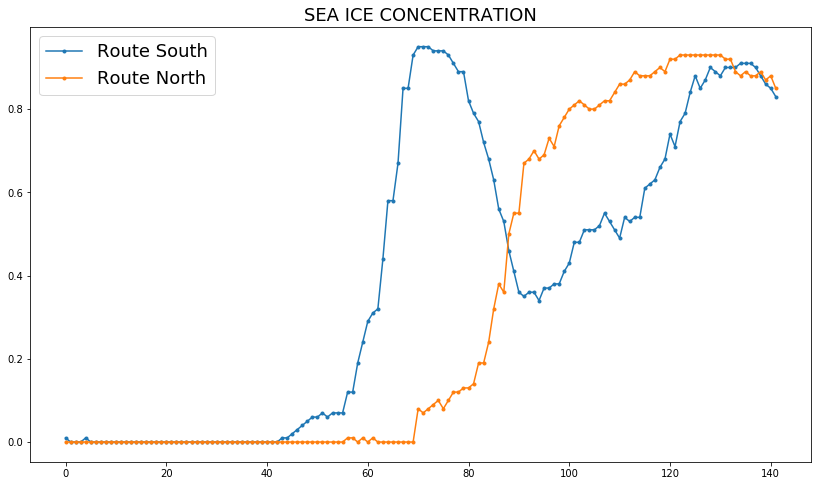

In [13]:
plt.figure(figsize=(14,8))
plt.plot(trn0siw['sea_ice_fraction'], '.-', label='Route South')
plt.plot(trn1siw['sea_ice_fraction'], '.-', label='Route North')
plt.title('SEA ICE CONCENTRATION', fontsize=18)
plt.legend(fontsize=18)

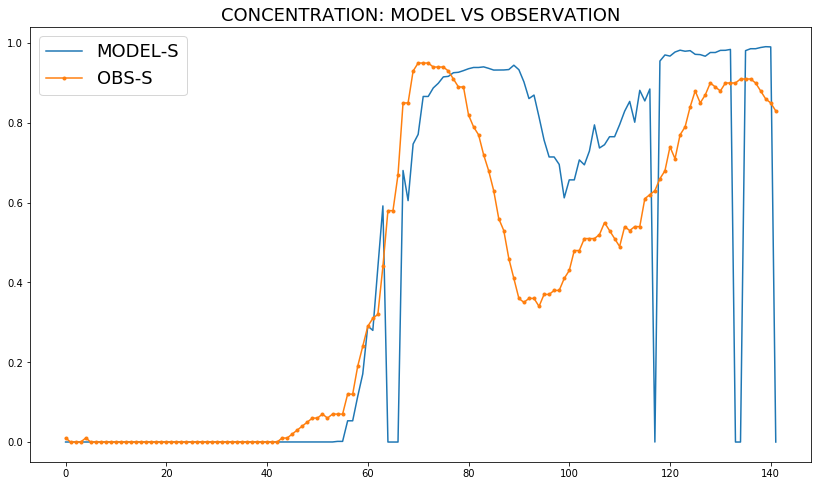

In [14]:
plt.figure(figsize=(14,8))
plt.plot(trn0['fice'], '-', label='MODEL-S')
plt.plot(trn0siw['sea_ice_fraction'], '.-', label='OBS-S')
plt.title('CONCENTRATION: MODEL VS OBSERVATION', fontsize=18)
plt.legend(fontsize=18)

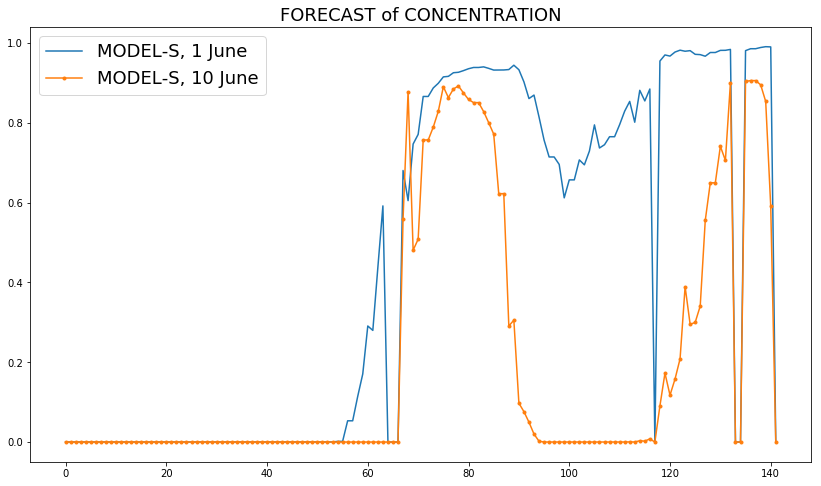

In [15]:
plt.figure(figsize=(14,8))
plt.plot(trn0['fice'], '-', label='MODEL-S, 1 June')
plt.plot(trn0_10['fice_010'], '.-', label='MODEL-S, 10 June')

plt.title('FORECAST of CONCENTRATION', fontsize=18)
plt.legend(fontsize=18)

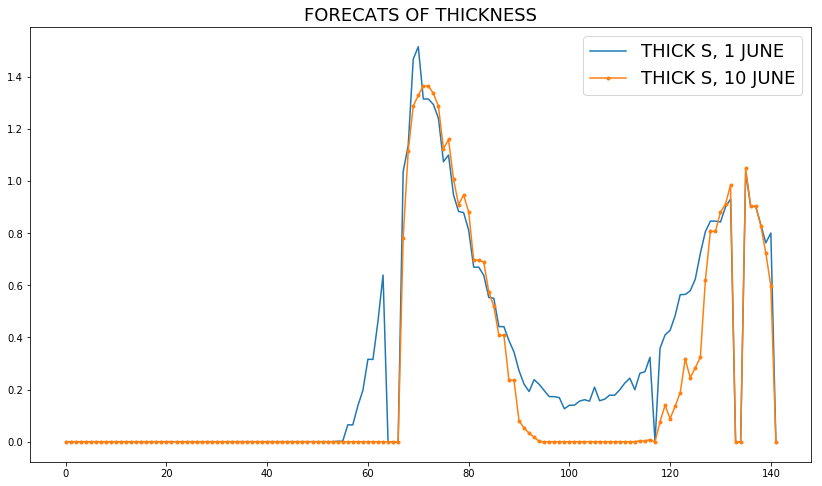

In [16]:
plt.figure(figsize=(14,8))
plt.plot(trn0['hice'], '-', label='THICK S, 1 JUNE')
plt.plot(trn0_10['hice_010'], '.-', label='THICK S, 10 JUNE')

plt.title('FORECATS OF THICKNESS', fontsize=18)
plt.legend(fontsize=18)

In [17]:
vol0 = trn0_10['hice_010'] * trn0_10['fice_010']
vol1 = trn1_10['hice_010'] * trn1_10['fice_010']

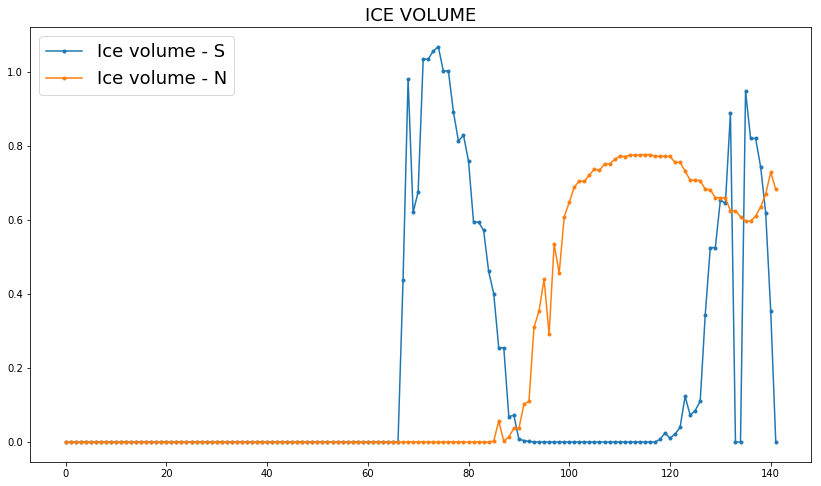

In [18]:
plt.figure(figsize=(14,8))
plt.plot(vol0, '.-', label='Ice volume - S')
plt.plot(vol1, '.-', label='Ice volume - N')
plt.title('ICE VOLUME', fontsize=18)
plt.legend(fontsize=18)

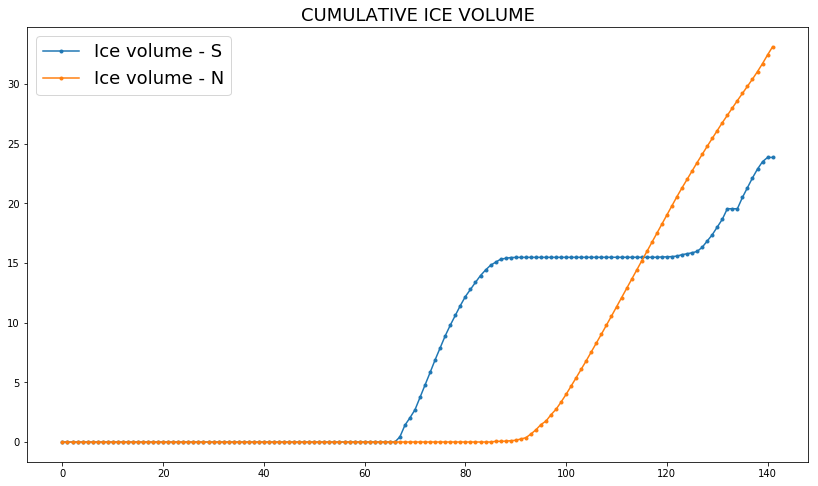

In [19]:
plt.figure(figsize=(14,8))
plt.plot(np.cumsum(vol0), '.-', label='Ice volume - S')
plt.plot(np.cumsum(vol1), '.-', label='Ice volume - N')
plt.title('CUMULATIVE ICE VOLUME', fontsize=18)
plt.legend(fontsize=18)